In [1]:
##import the necessary libraries and load the dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Create a directory for the data
!mkdir -p data

# Download the dataset from data.transportation.gov
!wget -O data/raw_data.csv "https://data.transportation.gov/api/views/9ivb-8ae9/rows.csv?accessType=DOWNLOAD"

--2025-03-12 22:43:56--  https://data.transportation.gov/api/views/9ivb-8ae9/rows.csv?accessType=DOWNLOAD
Resolving data.transportation.gov (data.transportation.gov)... 52.206.68.26, 52.206.140.205, 52.206.140.199
Connecting to data.transportation.gov (data.transportation.gov)|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘data/raw_data.csv’

data/raw_data.csv       [           <=>      ]  91.35M  5.30MB/s    in 17s     

2025-03-12 22:44:14 (5.37 MB/s) - ‘data/raw_data.csv’ saved [95792699]



In [3]:
# Enable inline plotting for Jupyter Notebook
%matplotlib inline

# Set a style for the plots
sns.set(style="whitegrid")

# Load the dataset
data_path = "data/raw_data.csv"
df = pd.read_csv(data_path)

# Display the first few rows of the dataframe
df.head()

<ipython-input-3-2b7f19373cd1>:9: DtypeWarning: Columns (18,20,24,34,38,45,46,49,53,54,60,63,64,69,71) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


,NTD ID,Agency,Primary UZA UACE Code,Rail/Bus/Ferry,Mode Name,Mode,TOS,Fixed Route Flag,Year,Event Description,...,Occupant of Other Vehicle Injuries,Occupant of Other Vehicle Serious Injuries,Other Injuries,Other Serious Injuries,Suicide Injuries,Suicide Serious Injuries,Trespasser Inuries (Subtotal),Trespasser Serious Injuries (Subtotal),Total Serious Injuries,Person List
0,20080,New Jersey Transit Corporation,63217,Bus,Bus,MB,DO,True,2024,Bus was parked in <REDACTED> <REDACTED> and an...,...,0,0,0,0,0,0,0,0,0,NaN
1,40035,Central Florida Regional Transportation Authority,65863,Bus,Demand Response,DR,DO,False,2024,Another vehicle made other front contact with ...,...,1,0,0,0,0,0,0,0,0,I Operator Inside Adult (19 to 60) F ; I ...
2,50027,Metro Transit,57628,Rail,Light Rail,LR,DO,True,2024,Officers responded to a shooting . Suspect was...,...,0,0,0,0,0,0,0,0,0,F Passenger Adult (19 to 60) M
3,90026,San Diego Metropolitan Transit System,78661,Rail,Light Rail,LR,DO,True,2024,San Diego Police took a female into custody af...,...,0,0,0,0,0,0,0,0,0,I Wait Leave Adult (19 to 60) M Y
4,20080,New Jersey Transit Corporation,63217,Bus,Bus,MB,DO,True,2024,operator was driving down <REDACTED> <REDACTED...,...,1,0,0,0,0,0,0,0,0,I Occ Other Veh Adult (19 to 60) M


In [4]:
# Check the structure and data types
df.info()

# Get summary statistics for numerical columns
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98723 entries, 0 to 98722
Columns: 122 entries, NTD ID to Person List
dtypes: bool(3), float64(5), int64(52), object(62)
memory usage: 89.9+ MB


,NTD ID,Primary UZA UACE Code,Year,Incident Number,Property Damage,Total Injuries,Total Fatalities,Number of Transit Vehicles Involved,Number of Non-Transit Vehicles Involved,Number of Cars on Involved Transit Vehicles,...,Pedestrian Walking Along Tracks Serious Injuries,Occupant of Other Vehicle Injuries,Occupant of Other Vehicle Serious Injuries,Other Injuries,Other Serious Injuries,Suicide Injuries,Suicide Serious Injuries,Trespasser Inuries (Subtotal),Trespasser Serious Injuries (Subtotal),Total Serious Injuries
count,98723.000000,98723.000000,98723.000000,9.872300e+04,7.767400e+04,98723.000000,98723.000000,98723.000000,98723.000000,98723.000000,...,98723.000000,98723.000000,98723.000000,98723.000000,98723.000000,98723.000000,98723.000000,98723.000000,98723.000000,98723.000000
mean,44128.351752,51926.210366,2019.198079,2.815015e+06,9.190472e+03,1.105588,0.031654,0.778633,0.703321,0.615530,...,0.000699,0.239255,0.001611,0.009501,0.002208,0.008650,0.002836,0.011122,0.005743,0.024118
std,25987.890590,26165.757974,3.144623,1.247122e+06,5.540650e+04,1.452625,0.184323,0.438058,0.658204,1.647667,...,0.026428,0.616938,0.054269,0.101601,0.047583,0.093042,0.053181,0.107072,0.075968,0.211009
min,1.000000,17.000000,2014.000000,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20080.000000,23527.000000,2016.000000,2.411780e+06,3.500000e+02,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,40034.000000,63217.000000,2019.000000,3.042599e+06,2.800000e+03,1.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,60011.000000,69184.000000,2022.000000,3.714684e+06,1.000000e+04,1.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,99423.000000,99999.000000,2024.000000,4.416377e+06,9.100000e+06,85.000000,10.000000,4.000000,27.000000,35.000000,...,1.000000,43.000000,8.000000,4.000000,2.000000,2.000000,1.000000,5.000000,2.000000,39.000000


In [5]:
# prompt: get a list of full columns names and print out

# Get a list of all column names
column_names = df.columns.tolist()

# Print the list of column names
column_names


['NTD ID',
 'Agency',
 'Primary UZA UACE Code',
 'Rail/Bus/Ferry',
 'Mode Name',
 'Mode',
 'TOS',
 'Fixed Route Flag',
 'Year',
 'Event Description',
 'Incident Number',
 'Event Date',
 'Event Time',
 'Event Type',
 'Event Type Group',
 'Transit Worker Type',
 'Transit Worker Assault Detail Type',
 'Transit Worker Assault Flag',
 'Other Event Type Description',
 'Event Category',
 'Runaway Train Flag',
 'Safety/Security',
 'Collision With',
 'Property Damage',
 'Substantial Property Damage Type',
 'Total Injuries',
 'Total Fatalities',
 'Towed (Y/N)',
 'Number of Transit Vehicles Involved',
 'Number of Non-Transit Vehicles Involved',
 'Number of Cars on Involved Transit Vehicles',
 'Number of Derailed Cars on Involved Transit Vehicles',
 'Non-Transit Vehicle Type List',
 'Location Type',
 'Multiple Locations List',
 'Approximate Address',
 'Latitude',
 'Longitude',
 'LatLon',
 'Evacuation',
 'Evacuation for Life Safety (Y/N)',
 'Evacuation to Right-of-Way',
 'Evacuation Comment',
 'Sel

In [6]:
# Example: Convert a date column to datetime (adjust 'Event Date' to your actual column name)
if 'Event Date' in df.columns:
    df['Event Date'] = pd.to_datetime(df['Event Date'], errors='coerce')


In [7]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)


Missing values per column:
 NTD ID                                        0
Agency                                        0
Primary UZA UACE Code                         0
Rail/Bus/Ferry                                0
Mode Name                                     0
                                          ...  
Suicide Serious Injuries                      0
Trespasser Inuries (Subtotal)                 0
Trespasser Serious Injuries (Subtotal)        0
Total Serious Injuries                        0
Person List                               26492
Length: 122, dtype: int64


In [11]:
# prompt: rank columns name by the count of missing values, print the first 30 colmns

# Sort the columns by the number of missing values in descending order
missing_values_sorted = missing_values.sort_values(ascending=False)

# Print the first 10 columns with the most missing values
print("\nTop 10 columns with most missing values:\n", missing_values_sorted.head(30))



Top 10 columns with most missing values:
 Other Fire Fuel Description                             98720
HazMat Type Description                                 98716
HazMat Type                                             98709
Current Condition                                       98707
Tide                                                    98707
Operator Location                                       98695
Rail Grade Crossing Comment                             98690
Service Stop Control Device                             98685
Multiple Locations List                                 98679
Weather Comment                                         98662
Runaway Train Flag                                      98647
Other Event Type Description                            97905
Fire Fuel                                               97791
Fire Type                                               97776
Derailment Type                                         97374
Track Configuration        

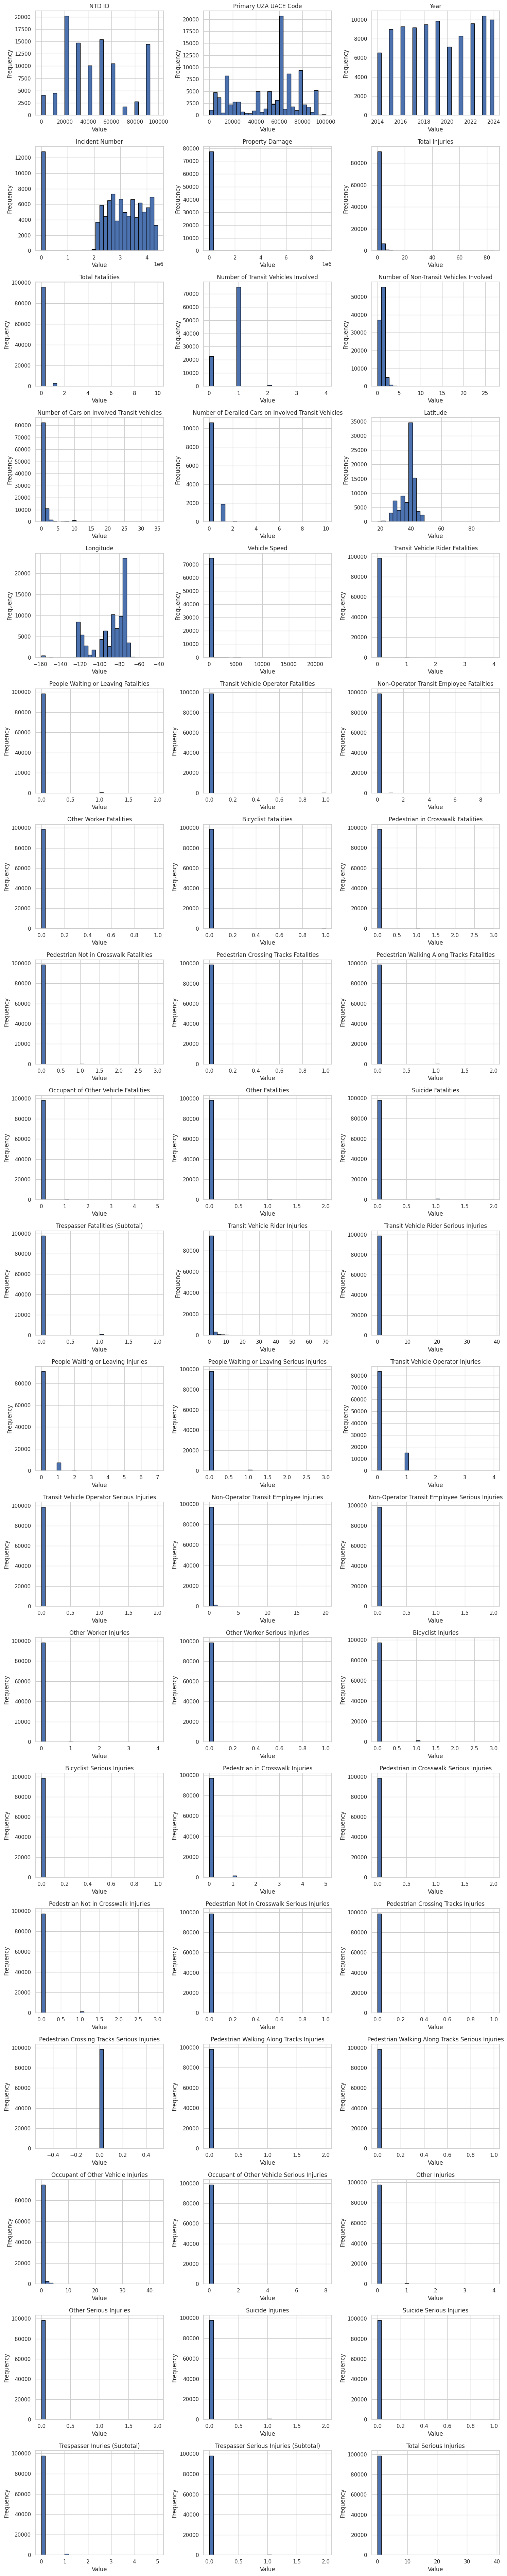

In [16]:
import math
import matplotlib.pyplot as plt

# Select numerical columns from the DataFrame
num_cols = df.select_dtypes(include='number').columns
n_cols = len(num_cols)

# Define number of columns per row (adjust as needed)
cols_per_row = 3
n_rows = math.ceil(n_cols / cols_per_row)

fig, axes = plt.subplots(n_rows, cols_per_row, figsize=(cols_per_row * 5, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    axes[i].hist(df[col].dropna(), bins=30, edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Hide any extra subplots if the grid is larger than the number of numerical columns
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

